In [7]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print (x + y)
print (np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print (x - y)
print (np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print (x * y)
print (np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print (x / y)
print (np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print (np.sqrt(x))



[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


In [9]:
print(x.T)

[[ 1.  3.]
 [ 2.  4.]]


In [17]:
x = np.array([1,0,1])
v = np.tile(x, (5,1))
print(v)


[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [23]:
vec = np.array([1,2,3,4])
print ( np.reshape(vec, (4,1)) )

[[1]
 [2]
 [3]
 [4]]


uint8 (400, 248, 3)


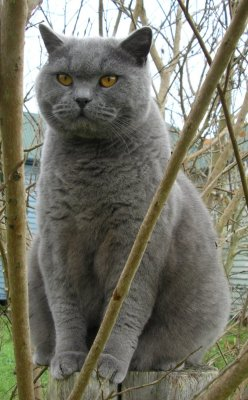

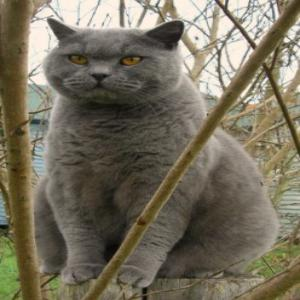

In [30]:
from scipy.misc import imread, imsave, imresize, imshow

# Read an JPEG image into a numpy array
img = imread('asserts/cat.jpg')
print (img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = imresize(img_tinted, (300, 300))

# Write the tinted image back to disk
imsave('asserts/cat_tinted.jpg', img_tinted)


from IPython.display import Image, display

listOfImageNames = ['asserts/cat.jpg', 'asserts/cat_tinted.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

# Distance between points

SciPy defines some useful functions for computing distances between sets of points.

The function ```scipy.spatial.distance.pdist``` computes the distance between all pairs of points in a given set:

In [33]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print (x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print (d)

[[0 1]
 [1 0]
 [2 0]]
[[ 0.          1.41421356  2.23606798]
 [ 1.41421356  0.          1.        ]
 [ 2.23606798  1.          0.        ]]


# Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.


## Plotting

The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

---

## Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

---

## Images

You can use the imshow function to show images. Here is an example:

In [42]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('asserts/cat.jpg')
img_tinted = img * [1, 0.95, 0.9]
img_tinted = imresize(img_tinted, (300, 400))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.unit8(img_tinted))
plt.show()